In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

In [2]:
data = pd.read_csv('/content/Creditcard_data.csv')
df = data

# Data Description

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(772, 31)

In [5]:
values = df['Class'].value_counts()
values

0    763
1      9
Name: Class, dtype: int64

<Axes: title={'center': 'Imblanced Data'}, xlabel='Class', ylabel='Count'>

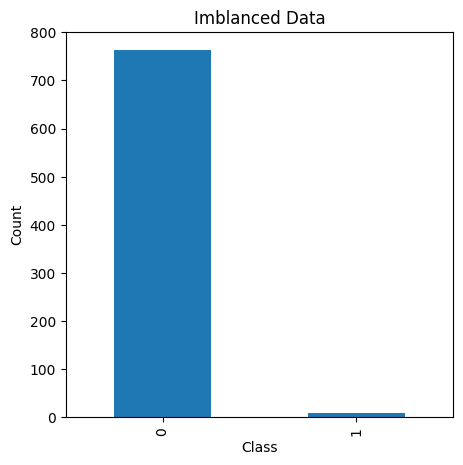

In [6]:
plt.figure(figsize=(5,5))
plt.title('Imblanced Data')
plt.xlabel('Class')
plt.ylabel('Count')
df['Class'].value_counts().plot(kind='bar')

In [7]:
print("Percentage of fraud transactions: ", values[1]/values[0] * 100)

Percentage of fraud transactions:  1.1795543905635648


# Converting Imbalanced to Balanced dataset
Fraud transactions are very less compared to legit transactions hence the data is highly imbalanced. We use **SMOTE** (*Synthetic Minority Oversampling Technique*) to **over sample the miniority class** to balance the data set.

In [8]:
X = df.drop('Class', axis = 1)
Y = df['Class']

In [9]:
print(X.shape)
print(Y.shape)
print(Y.value_counts())

(772, 30)
(772,)
0    763
1      9
Name: Class, dtype: int64


In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [12]:
print(X.shape)
print(Y.shape)
print(Y.value_counts())

(1526, 30)
(1526,)
0    763
1    763
Name: Class, dtype: int64


<Axes: title={'center': 'Balanced Data'}, xlabel='Class', ylabel='Count'>

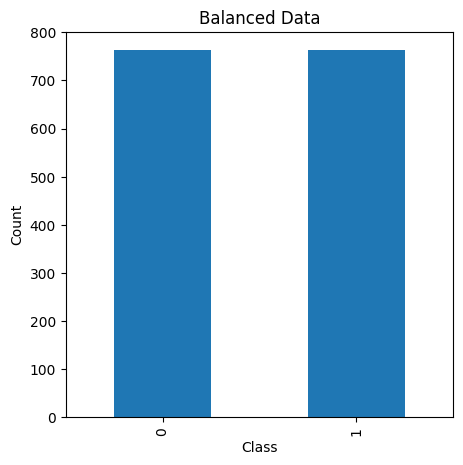

In [13]:
plt.figure(figsize=(5,5))
plt.title('Balanced Data')
plt.xlabel('Class')
plt.ylabel('Count')
Y.value_counts().plot(kind='bar')

# Sampling

In [14]:
samples=[]
df = pd.concat([X,Y], axis = 1)

In [15]:
df.head(350)['Class'].value_counts() # data is not shullefed

0    347
1      3
Name: Class, dtype: int64

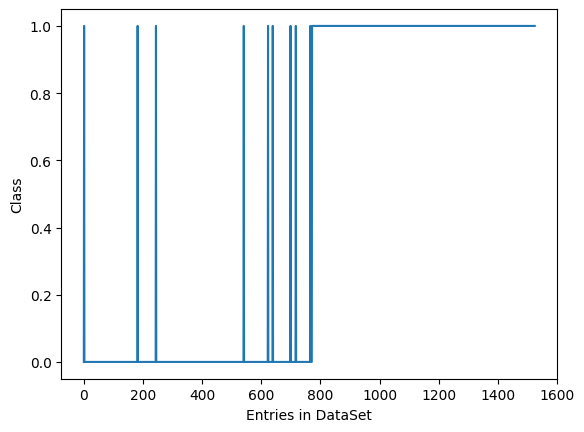

In [16]:
plt.plot(df['Class']) # the latter half of data['class'] is '1'
plt.xlabel("Entries in DataSet")
plt.ylabel("Class")
plt.show()

In [17]:
df = df.sample(frac=1) # shuffle the data set

In [18]:
df.head(350)['Class'].value_counts()

1    183
0    167
Name: Class, dtype: int64

## Convenience sampling

In [19]:
s1 = df.head(math.ceil(len(df)/6))

In [20]:
s1.shape

(255, 31)

In [21]:
s1['Class'].value_counts()

1    130
0    125
Name: Class, dtype: int64

<Axes: title={'center': 'Class Distribution of Convenience Sampling'}, xlabel='Class', ylabel='Count'>

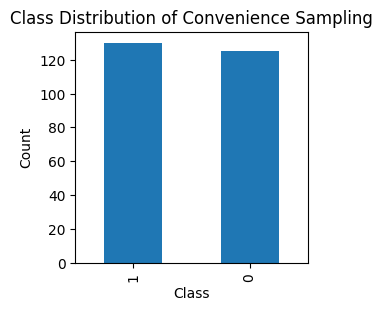

In [22]:
plt.figure(figsize=(3,3))
plt.title('Class Distribution of Convenience Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
s1['Class'].value_counts().plot(kind = 'bar')

In [23]:
samples.append(s1)

## Simple Random Sampling

In [24]:
Z = 1.96
p = 0.5
E = 0.1
n = (Z**2 * p * (1-p)) / (E**2)
n = math.ceil(n)

print("Sample Size:",n)

Sample Size: 97


In [25]:
s2 = df.sample(n=n,random_state=42)

In [26]:
s2['Class'].value_counts()

1    52
0    45
Name: Class, dtype: int64

<Axes: title={'center': 'Class Distribution of Random Sampling'}, xlabel='Class', ylabel='Count'>

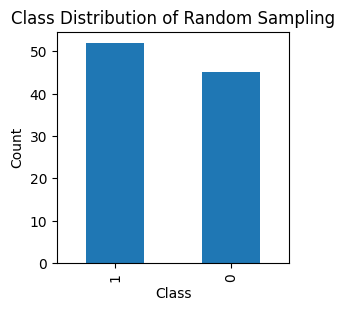

In [27]:
plt.figure(figsize=(3,3))
plt.title('Class Distribution of Random Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
s2['Class'].value_counts().plot(kind = 'bar')

In [28]:
samples.append(s2)

## Systematic Sampling

In [29]:
interval = 10
print(interval)

10


In [30]:
s3 = df.iloc[::interval]
s3.shape

(153, 31)

In [31]:
s3['Class'].value_counts()

0    80
1    73
Name: Class, dtype: int64

<Axes: title={'center': 'Class Distribution of Systematic Sample'}, xlabel='Class', ylabel='Count'>

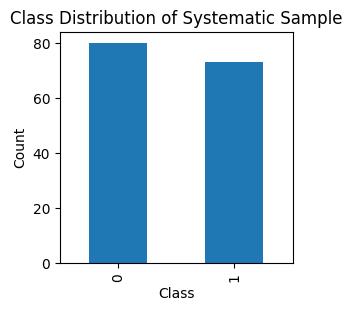

In [32]:
plt.figure(figsize=(3,3))
plt.title('Class Distribution of Systematic Sample')
plt.xlabel('Class')
plt.ylabel('Count')
s3['Class'].value_counts().plot(kind = 'bar')

In [33]:
samples.append(s3)

## Stratified Sampling

In [34]:
z=1.96
p=0.5
E=0.2
S=2
n=(z**2*p*(1-p))/((E/S)**2)
n = math.ceil(n)

print("Sample Size:",n)

Sample Size: 97


In [35]:
s4 = df.groupby('Class', group_keys=False).apply(lambda x: x.sample(n))
s4.shape

(194, 31)

In [36]:
s4['Class'].value_counts()

0    97
1    97
Name: Class, dtype: int64

<Axes: title={'center': 'Class Distribution of Stratified Sample'}, xlabel='Class', ylabel='Count'>

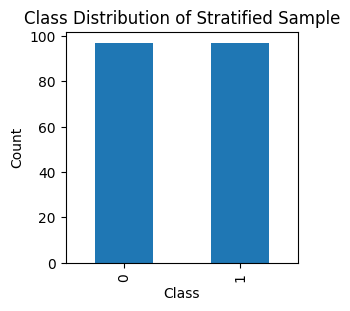

In [37]:
plt.figure(figsize=(3,3))
plt.title('Class Distribution of Stratified Sample')
plt.xlabel('Class')
plt.ylabel('Count')
s4['Class'].value_counts().plot(kind = 'bar')

In [38]:
samples.append(s4)

## Cluster Sampling

In [39]:
from sklearn.cluster import KMeans

In [40]:
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(df.drop("Class", axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
df["cluster"] = clusters

In [42]:
df['cluster'].value_counts()

7    420
1    279
5    232
8    228
0    221
6     60
9     40
4     35
3     10
2      1
Name: cluster, dtype: int64

<Axes: title={'center': 'Cluster Distribution'}, xlabel='Clusters', ylabel='Number of entries'>

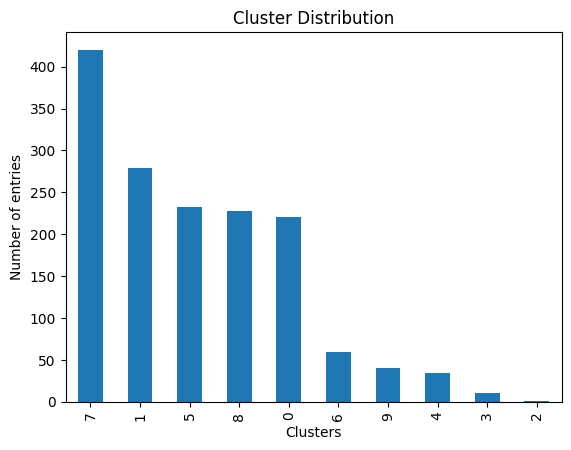

In [43]:
df['cluster'].value_counts().plot(kind = 'bar', xlabel = 'Clusters', ylabel = 'Number of entries', title = 'Cluster Distribution')

<Axes: xlabel='cluster', ylabel='count'>

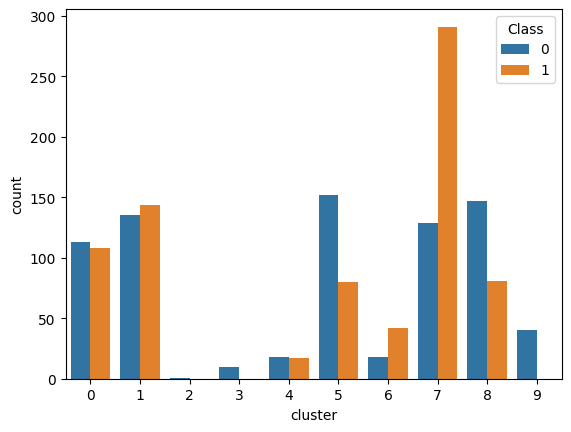

In [44]:
sns.countplot(x = 'cluster', hue = 'Class', data = df)

In [45]:
selected_clusters = random.sample(range(10), 3)
selected_clusters

[9, 7, 0]

In [46]:
s5 = df[df["cluster"].isin(selected_clusters)]

In [47]:
s5.shape

(681, 32)

In [48]:
s5['Class'].value_counts()

1    399
0    282
Name: Class, dtype: int64

<Axes: title={'center': 'Sample Class Distribution'}, xlabel='Class', ylabel='Count'>

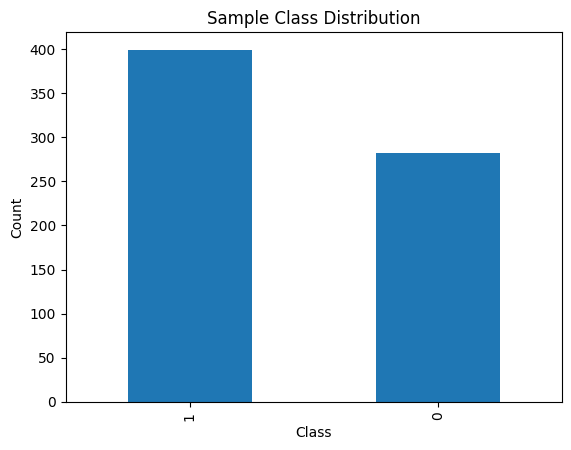

In [49]:
s5['Class'].value_counts().plot(kind = 'bar', xlabel = 'Class', ylabel = 'Count', title = 'Sample Class Distribution')

[Text(0.5, 0, 'Clusters'),
 Text(0, 0.5, 'Class Count'),
 Text(0.5, 1.0, 'Cluster-wise Sample Class Distribution')]

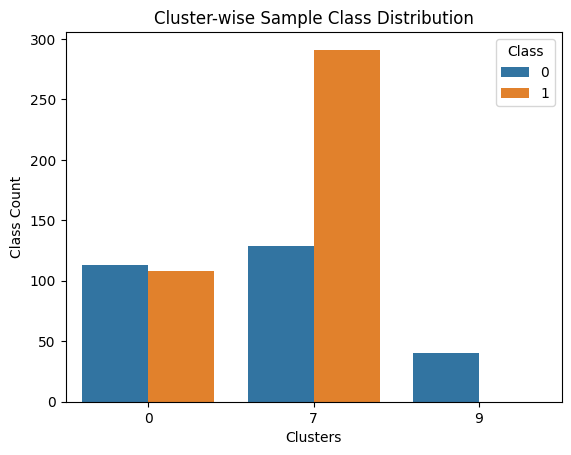

In [50]:
sns.countplot(x = 'cluster', hue = 'Class', data = s5).set(xlabel = 'Clusters', ylabel = 'Class Count', title = 'Cluster-wise Sample Class Distribution')

In [51]:
s5.drop('cluster', inplace = True, axis = 1)
df.drop('cluster', inplace = True, axis = 1)

<ipython-input-51-3aac4b2f494f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s5.drop('cluster', inplace = True, axis = 1)


In [52]:
samples.append(s5)


# ML models on each Sampling Techniques

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # Support Vector Classifier (SVC)
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [54]:
header=['Convenience','Random','Systematic','Stratified','Cluster']
ans = pd.DataFrame(columns = header, index=['Logistic Regression','SVM','KNN','Random Forest','Decision Tree'])

for i in range(len(samples)):
  j = 0 # to change model in answer (ith sample, jth model)
  x = samples[i].drop('Class', axis = 1)
  y = samples[i]['Class']
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  # LogisticRegression
  model = LogisticRegression()
  model.fit(x_train, y_train)
  predict = model.predict(x_test)
  accuracy = accuracy_score(y_test, predict)*100
  ans.iloc[j,i] = accuracy

  # SVM
  model = SVC(kernel="linear")
  model.fit(x_train, y_train)
  predict = model.predict(x_test)
  accuracy = accuracy_score(y_test, predict)*100
  ans.iloc[j+1,i] = accuracy

  # KNN
  model = KNeighborsClassifier(n_neighbors = 4)
  model.fit(x_train, y_train)
  predict = model.predict(x_test)
  accuracy = accuracy_score(y_test, predict)*100
  ans.iloc[j+2,i] = accuracy

  # Random Forest
  model = RandomForestClassifier(n_estimators = 100)
  model.fit(x_train, y_train)
  predict = model.predict(x_test)
  accuracy = accuracy_score(y_test, predict)*100
  ans.iloc[j+3,i] = accuracy

  # Decision Tree
  model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  model.fit(x_train, y_train)
  predict = model.predict(x_test)
  accuracy = accuracy_score(y_test, predict)*100
  ans.iloc[j+4,i] = accuracy

print(ans)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                    Convenience Random Systematic Stratified    Cluster
Logistic Regression   92.156863   90.0  83.870968  94.871795  91.240876
SVM                   94.117647   90.0  87.096774  92.307692  95.620438
KNN                   74.509804   65.0   54.83871  82.051282  86.861314
Random Forest         98.039216  100.0  90.322581      100.0  99.270073
Decision Tree         94.117647   85.0  80.645161  92.307692  96.350365


In [55]:
ans

,Convenience,Random,Systematic,Stratified,Cluster
Logistic Regression,92.156863,90.0,83.870968,94.871795,91.240876
SVM,94.117647,90.0,87.096774,92.307692,95.620438
KNN,74.509804,65.0,54.83871,82.051282,86.861314
Random Forest,98.039216,100.0,90.322581,100.0,99.270073
Decision Tree,94.117647,85.0,80.645161,92.307692,96.350365


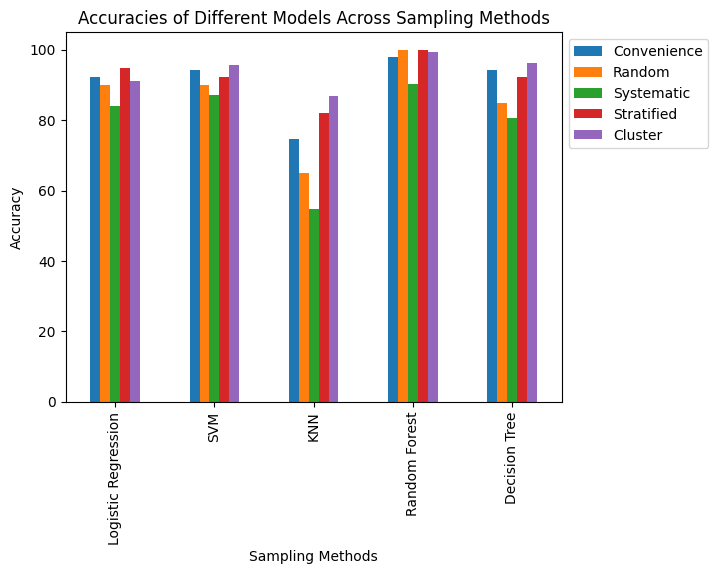

In [56]:
ans.plot(kind='bar')

plt.xlabel("Sampling Methods")
plt.ylabel("Accuracy")
plt.title("Accuracies of Different Models Across Sampling Methods")
plt.legend()
plt.legend(bbox_to_anchor=(1, 1))
plt.show()